# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Korkmaz

Student name: Burla Nur
    
ID: 2008484

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 123456 # place a random seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [64 53 57 63 71 57 63 56 60 56]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


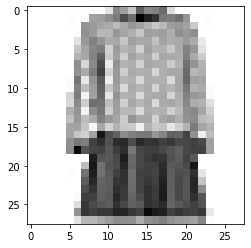

LABEL: 3
INPUT:


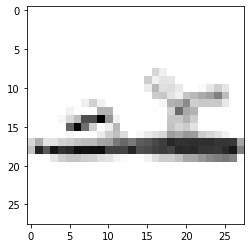

LABEL: 5
INPUT:


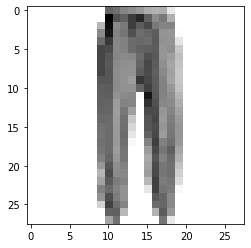

LABEL: 1
INPUT:


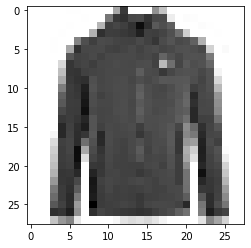

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
import pandas as pd

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM
clf = GridSearchCV(SVC(kernel = 'linear'), parameters, cv=4)
clf.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(pd.DataFrame(clf.cv_results_))

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1}
Score with best parameters:
0.7716666666666667

All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.294217      0.005859         0.066314        0.001483   0.001   
1       0.153334      0.002363         0.055111        0.001790    0.01   
2       0.126661      0.001865         0.049121        0.000430     0.1   
3       0.130152      0.003491         0.046874        0.000705       1   
4       0.133651      0.005516         0.047620        0.000826      10   
5       0.134890      0.003754         0.048871        0.000706     100   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.566667           0.626667           0.560000   
1   {'C': 0.01}           0.720000           0.766667           0.706667   
2    {'C': 0.1}           0.766667           0.820000           0.760000   
3      {'C': 1}           0.746667

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel
clf = GridSearchCV(SVC(kernel = 'poly', degree = 2), parameters, cv=4)
clf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(pd.DataFrame(clf.cv_results_))

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 5.0}
Score with best parameters:
0.75

All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.146113      0.005843         0.049866        0.000705    0.05   
1       0.126658      0.000989         0.044884        0.002116    0.05   
2       0.124919      0.002271         0.044380        0.001116    0.05   
3       0.129405      0.001918         0.046376        0.000859     0.5   
4       0.123162      0.002480         0.044392        0.001487     0.5   
5       0.123672      0.003245         0.044140        0.001307     0.5   
6       0.123669      0.002906         0.044124        0.001785       5   
7       0.123920      0.003106         0.044881        0.001223       5   
8       0.125170      0.001116         0.044879        0.000707       5   

  param_gamma                      params  split0_test_score  \
0        0.05  {'C': 0.05, 'gamma': 0.05}

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4
clf = GridSearchCV(SVC(kernel = 'poly', degree = degree), parameters, cv=4)
clf.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(pd.DataFrame(clf.cv_results_))

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.05}
Score with best parameters:
0.6816666666666666

All scores on the grid:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.128160      0.008059         0.042634        0.000431    0.05   
1       0.113953      0.001915         0.041390        0.001116    0.05   
2       0.112199      0.003758         0.040641        0.000831    0.05   
3       0.114207      0.002686         0.040890        0.001578     0.5   
4       0.116448      0.003965         0.042628        0.000825     0.5   
5       0.123175      0.005708         0.044369        0.003753     0.5   
6       0.116939      0.007337         0.044888        0.005092       5   
7       0.121417      0.004808         0.047372        0.005707       5   
8       0.114194      0.004703         0.042629        0.002845       5   

  param_gamma                      params  split0_test_score  \
0        0.05  {'C': 0.0

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel
clf = GridSearchCV(SVC(kernel = 'rbf'), parameters, cv=4)
clf.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(pd.DataFrame(clf.cv_results_))

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 50, 'gamma': 0.005}
Score with best parameters:
0.7833333333333333

All scores on the grid:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.234879      0.010474         0.071809        0.004622     0.5   
1        0.388461      0.025878         0.072546        0.004580     0.5   
2        0.413647      0.013644         0.075047        0.007308     0.5   
3        0.404433      0.007221         0.080518        0.010261     0.5   
4        0.155092      0.002686         0.054602        0.000824       5   
5        0.390953      0.011205         0.070568        0.007651       5   
6        0.408168      0.017796         0.072049        0.005648       5   
7        0.408649      0.013738         0.073806        0.003529       5   
8        0.165560      0.004126         0.054846        0.004613      50   
9        0.374261      0.003271         0.064824        0.001861      50   
10       0.38671

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

The worst result is obtained with polynomial kernel degree 4. polynomial kernel degree 2 has higher accuracy than degree 4. The highest accuracy is obtained with rbf kernel, linear kernel takes second place.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
parameters = {'C': [50], 'gamma': [0.005]}
best_SVM = GridSearchCV(SVC(kernel = 'rbf'), parameters, cv=4) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train,y_train) 

# (error is 1 - svm.score)
best_SVM.predict(X_train)
best_SVM.predict(X_test)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.189750


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test,train_error,test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model error={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model error={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

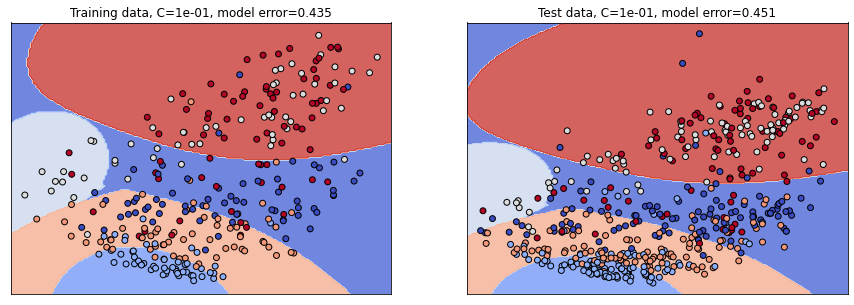

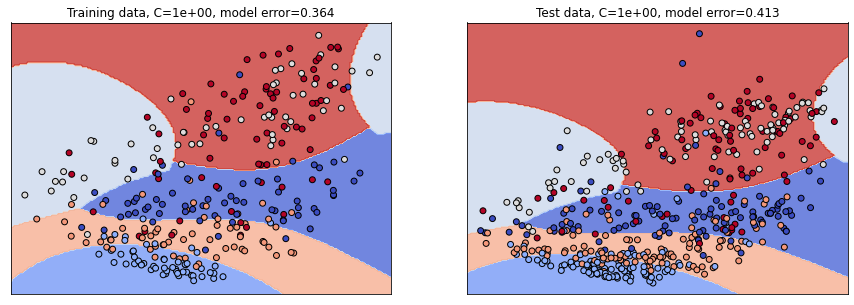

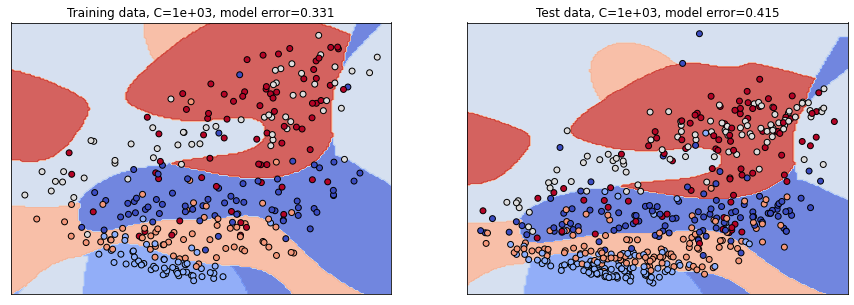

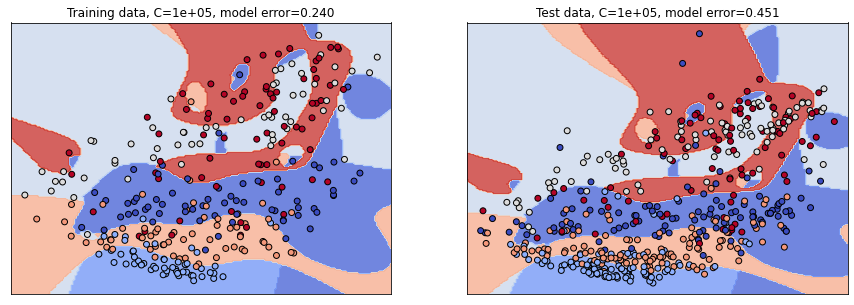

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    my_svm = SVC(kernel = 'rbf', C=C, gamma=gamma)
    my_svm.fit(X_train_pca,y_train_plot)
    
    train_error = 1 - my_svm.score(X_train_pca, y_train_plot)
    test_error = 1 - my_svm.score(X_test_pca, y_test_plot)
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot,train_error,test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

C parameter controls the cost of misclassification on the training data, smaller C allows to make more mistakes and that means makes the cost of misclassification low and the larger C makes the cost of misclassification high. As we observed from the plottings, the largest C can cause overfitting. So we can say that the shape of boundaries becomes more complicated and intertwined when C value gets bigger. 

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


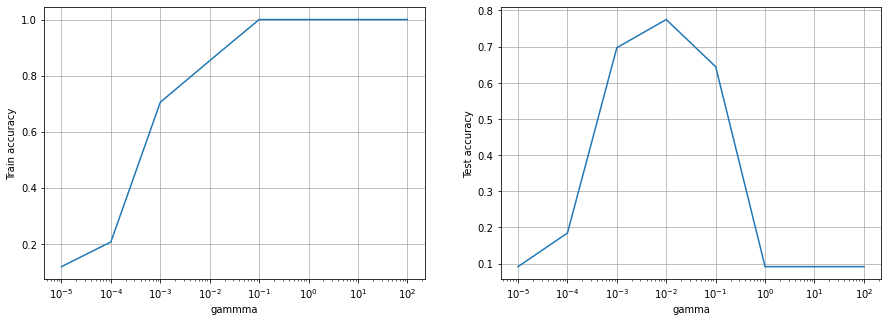

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for i in range(len(gamma_values)):
    clf = SVC(kernel = 'rbf', C = 1, gamma = gamma_values[i]) 
    clf.fit(X_train,y_train)
    
    a = clf.score(X_train,y_train)
    train_acc_list.append(a)
    
    b = clf.score(X_test,y_test)
    test_acc_list.append(b)
    
     
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

As we can see from the plottings, The accuracy is %100 with gammas between 0,1 and 100 on the training set. But if we check the results on the test set, we can see that after gamma 0,01 the accuracy decreased quickly. Because It overfits after 0,01 on the training set. So we can say that the best gamma is 0,01.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [182 137 144 143 179 128 143 155 154 135]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE
parameters = {'C': [50], 'gamma': [0.005]}
best_SVM = GridSearchCV(SVC(kernel = 'rbf'), parameters, cv=4)
best_SVM.fit(X_train,y_train)

training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.174051


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model

# ADD YOUR CODE
logreg = linear_model.LogisticRegression(C = 1e5)
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.218205


C:\Users\Burla Nur\.conda\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:
# ADD YOUR CODE
logreg = linear_model.LogisticRegression(C = 1)
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.015333
Best regularized logistic regression test error: 0.193607


C:\Users\Burla Nur\.conda\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression


- Although the training accuracies are the same (best_SVM with best parameters), test accuracy with 1500 training data points is higher than test accuracy with 600 training data points. The differences in test errors between m=600 and m=1500 are close to 0,015. Even more accuracy could be obtained with more training data points.
- Both results of Logistic Regression with large C and small C have more test error than test error of best_SVM. We can say that with 1500 training data points, best_SVM results are better. But The results could be changed depends on the parameters and the amount of the training data.

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

indexes of items of clothing that is missclassified by logistic regression and correctly classified by SVM in X_test[:200]:  [3, 58, 59, 64, 67, 80, 121, 172, 191] 

labels of correctly classified items by SVM (True Labels) in X_test[:200]:  [9, 4, 9, 9, 4, 6, 8, 2, 4] 

labels of missclassified by logistic regression in X_test[:200]:  [2, 6, 7, 5, 6, 1, 5, 6, 6] 


INDEX OF THE ITEM:  3
INPUT:


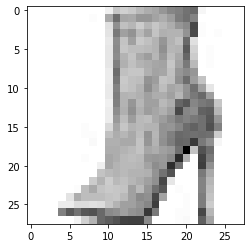

LABEL: 9


In [21]:
LR_prediction = logreg.predict(X_test[0:200])
SVM_prediction = best_SVM.predict(X_test[0:200])


LR_missclassified = {}
SVM_correctly = {}
for i in range(len(y_test[0:200])):   
    if LR_prediction[i] != y_test[i] and SVM_prediction[i] == y_test[i]:
        LR_missclassified[i] = LR_prediction[i]
        SVM_correctly[i] = SVM_prediction[i]
        

print("indexes of items of clothing that is missclassified by logistic regression and correctly classified by SVM in X_test[:200]: ", [key for key in LR_missclassified.keys()], "\n") # OR SVM_correctly.key()
print("labels of correctly classified items by SVM (True Labels) in X_test[:200]: ", [value for value in SVM_correctly.values()], "\n")  
print("labels of missclassified by logistic regression in X_test[:200]: ", [value for value in LR_missclassified.values()], "\n\n")       

print("INDEX OF THE ITEM: ", list(LR_missclassified.keys())[0])  #plotting only first item    
plot_input(X_test,y_test,list(LR_missclassified.keys())[0])

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

SVM_y_predict = best_SVM.predict(X_test) 
confusion_SVM = confusion_matrix(y_test,SVM_y_predict)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

LR_y_predict = logreg.predict(X_test)
confusion_LR = confusion_matrix(y_test,LR_y_predict)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5818 5863 5856 5857 5821 5872 5857 5845 5846 5865]

 Confusion matrix SVM  
 
 [[4807    5  101  221   29    3  570    0   81    1]
 [  64 5554   62  154   10    1   16    0    2    0]
 [ 214    3 4295   40  829    2  445    0   28    0]
 [ 468   41   88 4794  252    0  202    0   12    0]
 [  41    8  774  202 4374    2  399    0   21    0]
 [  14    0    2    2    0 5149    1  455   30  219]
 [1141    4  772  137  663    4 3031    0  104    1]
 [   0    0    0    0    0  209    0 5361   10  265]
 [  49    5   51   52   20   53   79   44 5485    8]
 [   0    0    2    1    0   73    0  318    3 5468]]

 Confusion matrix SVM (normalized)   
 
 [[0.83 0.   0.02 0.04 0.   0.   0.1  0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.04 0.   0.73 0.01 0.14 0.   0.08 0.   0.   0.  ]
 [0.08 0.01 0.02 0.82 0.04 0.   0.03 0.   0.   0.  ]
 [0.01 0.   0.13 0.03 0.75 0.   0.07 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.88 0.   0.08 0.0

In [23]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
SVM_y_predict = best_SVM.predict(X_test) 
confusion_SVM = confusion_matrix(y_test,SVM_y_predict,normalize='true')
print("\n Confusion matrix SVM normalized \n \n", confusion_SVM)

LR_y_predict = logreg.predict(X_test)
confusion_LR = confusion_matrix(y_test,LR_y_predict,normalize='true')
print("\n Confusion matrix LR normalized \n \n", confusion_LR)



 Confusion matrix SVM normalized 
 
 [[0.83 0.   0.02 0.04 0.   0.   0.1  0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.04 0.   0.73 0.01 0.14 0.   0.08 0.   0.   0.  ]
 [0.08 0.01 0.02 0.82 0.04 0.   0.03 0.   0.   0.  ]
 [0.01 0.   0.13 0.03 0.75 0.   0.07 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.88 0.   0.08 0.01 0.04]
 [0.19 0.   0.13 0.02 0.11 0.   0.52 0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.04 0.   0.92 0.   0.05]
 [0.01 0.   0.01 0.01 0.   0.01 0.01 0.01 0.94 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.05 0.   0.93]]

 Confusion matrix LR normalized 
 
 [[0.81 0.   0.02 0.04 0.01 0.   0.09 0.   0.02 0.  ]
 [0.   0.94 0.02 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.04 0.   0.69 0.01 0.15 0.   0.11 0.   0.01 0.  ]
 [0.07 0.01 0.02 0.79 0.04 0.   0.06 0.   0.   0.  ]
 [0.01 0.   0.12 0.03 0.73 0.   0.1  0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.85 0.   0.09 0.01 0.05]
 [0.18 0.   0.13 0.02 0.13 0.   0.51 0.   0.03 0.  ]
 [0.   0.   0.   0.   0

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Some classes have lower accuracy, for example, 6- Shirt. This class generally was mixed up with class 0 - T-shirt/top, class 2 - Pullover, and class 4 - Coat. Because these classes look like the same as each other. So It is hard to recognize them. Also, some classes have higher accuracy because it is easier to recognize them and their images are quite unique from each other when compared to low accuracy classes.